In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [32]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
algorithm = "td3" # "ppo"
txt_dir = "../SHARCNET/Results/debug/"+algorithm+"/300_300_NN/"+itv+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 4 files found
../SHARCNET/Results/debug/td3/300_300_NN/point75/SARA\2019-09-20-030027-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/SARA\2019-09-20-030029-1-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/SARA\2019-09-23-191103-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/SARA\2019-09-23-191103-1-0\td3\td3_s0\progress.txt
PLA: 4 files found
../SHARCNET/Results/debug/td3/300_300_NN/point75/PLA\2019-09-20-030028-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/PLA\2019-09-20-030030-1-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/PLA\2019-09-23-191103-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/300_300_NN/point75/PLA\2019-09-23-191103-1-0\td3\td3_s0\progress.txt


In [33]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [34]:
all_combined_data['PLA']

,return_run0,return_run1,return_run2,return_run3,return_avg,return_std,Q1_means_run0,Q1_means_run1,Q1_means_run2,Q1_means_run3,Q1_means_avg,Q1_means_std,Q2_means_run0,Q2_means_run1,Q2_means_run2,Q2_means_run3,Q2_means_avg,Q2_means_std
0,9.447188,6.122066,8.319290,2.758844,6.661847,2.550982,0.349564,0.206948,0.274245,0.063701,0.223615,0.105210,0.349676,0.210222,0.276692,0.064618,0.225302,0.105067
1,9.403156,8.880987,11.173931,5.887219,8.836323,1.902953,0.357146,0.282584,0.355488,0.138769,0.283497,0.088817,0.352014,0.279542,0.353151,0.138255,0.280741,0.087503
2,10.838635,13.804235,16.323673,10.249855,12.804099,2.437975,0.400079,0.379999,0.443385,0.212778,0.359060,0.087507,0.401851,0.382460,0.441305,0.212904,0.359630,0.087326
3,9.102488,14.161937,17.825026,9.266134,12.588896,3.643052,0.405228,0.445634,0.531970,0.275747,0.414645,0.092340,0.403799,0.447494,0.528409,0.271523,0.412806,0.093018
4,6.993397,10.972862,15.723486,11.213549,11.225824,3.090572,0.414720,0.486640,0.579751,0.328954,0.452516,0.092262,0.414085,0.486069,0.580086,0.331216,0.452864,0.091638
5,13.570241,13.385860,7.539488,13.472492,11.992020,2.571498,0.483660,0.549214,0.580270,0.399167,0.503078,0.069393,0.484323,0.549885,0.581970,0.396547,0.503182,0.070915
6,9.195775,10.473801,14.824707,12.624675,11.779739,2.142901,0.509472,0.598850,0.615403,0.489794,0.553380,0.054510,0.508916,0.598042,0.615755,0.492141,0.553714,0.053880
7,13.926159,8.040279,10.997717,11.396637,11.090198,2.088489,0.593898,0.647347,0.659120,0.604932,0.626324,0.027507,0.594705,0.646732,0.657557,0.604741,0.625934,0.026725
8,9.469217,8.637719,12.956984,8.563971,9.906973,1.796445,0.634519,0.700935,0.731101,0.702309,0.692216,0.035422,0.633613,0.700543,0.731428,0.701044,0.691657,0.035770
9,16.388556,9.562671,15.098880,9.291495,12.585401,3.192502,0.715054,0.764887,0.796900,0.839301,0.779035,0.045401,0.713968,0.766270,0.795707,0.836861,0.778201,0.044765


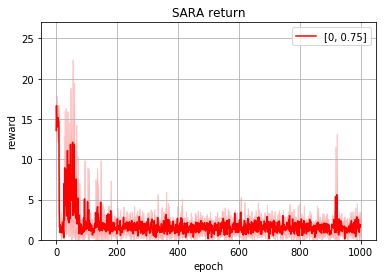

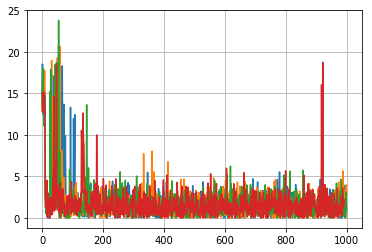

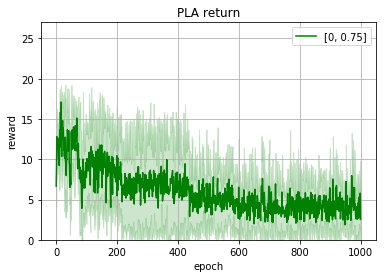

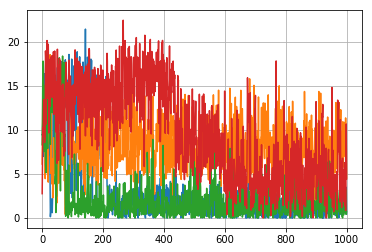

In [37]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig("./plots_for_thesis/debug/"+algorithm+"/300_300_NN/"+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')
    
    plt.figure()
    plt.grid()
    for i in range(4):
        plt.plot(data.index, data[metric+'_run'+str(i)], '-', label=label)


### 2. V_mean

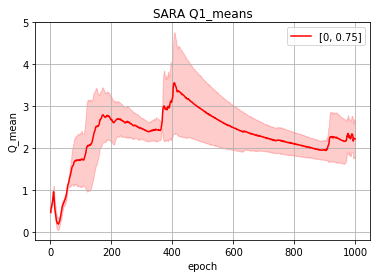

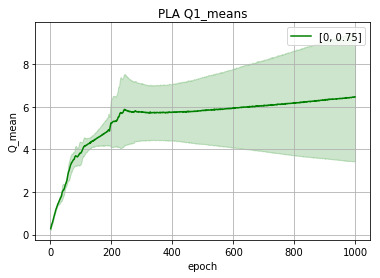

In [30]:
colors = ['r','g','b']
metric = "Q1_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/'+algorithm+'/300_300_NN/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    